# Part 1

Margin support vectors are vectors which do not violate the margin - they sit on the edges of the street where one would expect to find supporting vectors in a hard margin classifier. Another way of phrasing this is $\xi_n = 0$.  
Non-margin support vectors are supporting vectors that violate the margin. They can be correctly classified or not, but they are not on the margin itself. Yet again, this is $\xi_n > 0$.

# Part 2
Create a binary classification problem using sklearn.datasets.make moons. Build
a SVM classifier model and investigate the effect of hyper-parameters C, $\gamma$, and kernels on
the model performance.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

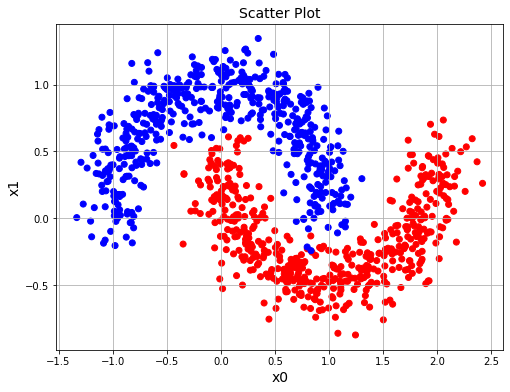

In [81]:
X, y = make_moons(n_samples = 1000, 
                  noise = 0.15, 
                  random_state=42)

colors = ["blue" if label == 0 else "red" for label in y]

plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], color = colors)
plt.xlabel("x0", fontsize = 14)
plt.ylabel("x1", fontsize=14)
plt.title("Scatter Plot", fontsize=14)
plt.grid();

In [82]:
# Split data into training sets, standardize the data based on the fit from train and transform both the training and the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

RBF/Linear GridSearchCV

In [83]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
  
# fitting the model for grid search 
grid.fit(X_train_scaled, y_train)

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [84]:
y_pred_train = grid.predict(X_train_scaled)
y_pred_test = grid.predict(X_test_scaled)
print(f"\
{accuracy_score(y_train, y_pred_train)}\n\
{accuracy_score(y_test, y_pred_test)}")

0.9942857142857143
0.9966666666666667


Test Data Decision Regions

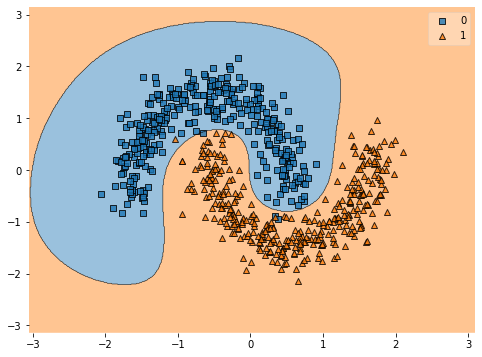

In [85]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X_train_scaled, y_train, clf = grid);

Test Data Decision Regions

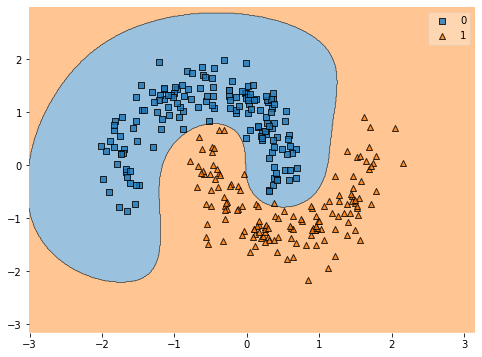

In [86]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X_test_scaled, y_test, clf = grid);

Polynomial GridSearchCV

In [87]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': [3,5,7,9], 
              'kernel': ['poly']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train_scaled, y_train)

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=0.1, degree=3, gamma=1, kernel=poly;, score=0.857 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=1, kernel=poly;, score=0.914 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=1, kernel=poly;, score=0.857 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=1, kernel=poly;, score=0.821 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=1, kernel=poly;, score=0.914 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.700 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.714 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.714 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.714 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.01, kernel=poly;, score=0.507 total time=   0.0s


In [88]:
y_pred_train = grid.predict(X_train_scaled)
y_pred_test = grid.predict(X_test_scaled)
print(f"\
{accuracy_score(y_train, y_pred_train)}\n\
{accuracy_score(y_test, y_pred_test)}")

0.9057142857142857
0.9233333333333333


Test Data Decision Regions

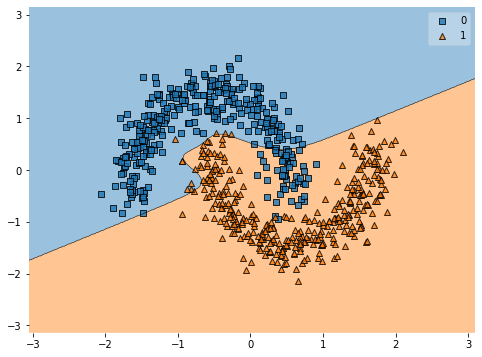

In [89]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X_train_scaled, y_train, clf = grid);

Test Data Decision Regions

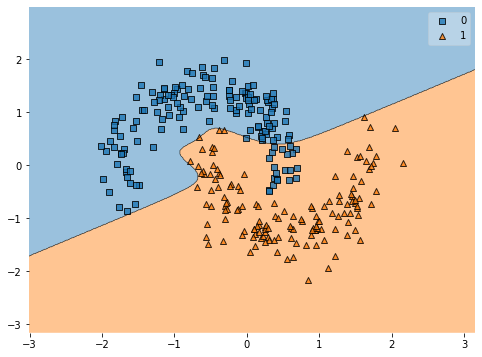

In [90]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X_test_scaled, y_test, clf = grid);

I think the RBF model that is shown above not only is the most accurate, but seems to most adequetely represent the data.